<a href="https://colab.research.google.com/github/riasrivast/AI-Powered-Color-Palette-Generator/blob/main/AI_Powered_Color_Palette_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
!git init


Reinitialized existing Git repository in /content/AI-Powered-Color-Palette-Generator/.git/


In [21]:
# Set up Git config
!git config --global user.name "riasrivast"
!git config --global user.email "riasrivast03@gmail.com"


In [37]:
!git add .


In [36]:
!git status


On branch main

No commits yet

nothing to commit (create/copy files and use "git add" to track)


In [24]:
!pip install pandas numpy matplotlib seaborn tensorflow

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

# Load the dataset
df = pd.read_json("https://huggingface.co/datasets/huggingface-projects/color-palettes-sd/resolve/main/data.json")

# Function to extract colors from the dataset
def extract_colors(row):
    colors = []
    # Iterate through images in each row and extract color palettes
    for image in row['data']['images']:
        colors.extend(image['colors'])  # Add all colors from each image
    return colors

# Apply the function to extract color palettes
df['colors'] = df.apply(extract_colors, axis=1)

# Now, we have a 'colors' column that contains color palettes
df.head()  # Check the first few rows of the dataset



,id,data,created_at,colors
0,1,{'prompt': 'a painting of a Ferrari by Claude ...,2022-09-21 05:52:14,"[#2f3c6e, #deacdf, #e2e23b, #b923bf, #ed68f7, ..."
1,2,{'prompt': 'a photo of a beautiful sunset in S...,2022-09-21 05:52:14,"[#e2dcf8, #d47a0d, #50244c, #b63547, #f270f2, ..."
2,3,{'prompt': 'a photo of a elmo drinking at star...,2022-09-21 05:52:14,"[#179209, #eee84b, #571208, #b91806, #537c91, ..."
3,4,{'prompt': 'a paint of a polar bear in the Arc...,2022-09-21 05:52:14,"[#3de9f9, #172eb8, #dc44d6, #1bd40d, #e7d9e8, ..."
4,5,{'prompt': 'a photo of a polar bear in the zoo...,2022-09-21 05:52:14,"[#cd1ce0, #f397ec, #980d30, #3e231a, #713789, ..."


In [26]:
# Function to convert HEX to normalized RGB
def hex_to_rgb(color):
    color = color.lstrip('#')
    return [int(color[i:i+2], 16) / 255.0 for i in (0, 2, 4)]

# Convert the HEX colors to RGB for each palette
df['rgb_colors'] = df['colors'].apply(lambda palette: [hex_to_rgb(c) for c in palette])

# Pad or trim each palette to exactly 5 colors (each with 3 RGB values)
def pad_palette(palette, target_length=5):
    # Pad with black [0, 0, 0] if fewer than 5 colors
    while len(palette) < target_length:
        palette.append([0.0, 0.0, 0.0])
    return palette[:target_length]

df['rgb_colors'] = df['rgb_colors'].apply(pad_palette)

# Flatten each palette (5 colors * 3 RGB values = 15 features)
X = np.array(df['rgb_colors'].apply(lambda colors: [val for rgb in colors for val in rgb]).tolist())

# Confirm shape: should be (num_samples, 15)
print("Data shape:", X.shape)




Data shape: (2714, 15)


In [17]:
# Define a simple feedforward neural network
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(15,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(15, activation='sigmoid'))  # 15 values for 5 RGB colors

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model and store training history
history = model.fit(X, X, epochs=50, batch_size=32, validation_split=0.2)





Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0570 - val_loss: 0.0247
Epoch 2/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0192 - val_loss: 0.0096
Epoch 3/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091 - val_loss: 0.0060
Epoch 4/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0058 - val_loss: 0.0040
Epoch 5/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0039 - val_loss: 0.0027
Epoch 6/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0025 - val_loss: 0.0018
Epoch 7/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 8/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 9/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0011 - val_loss: 9.3251e-04
Epoch 10/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.8894e-04 - val_loss: 7.7213e-04
Epoch 11/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.6406e-04 - val_loss: 6.9963e-04
Epoch 12/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.8780

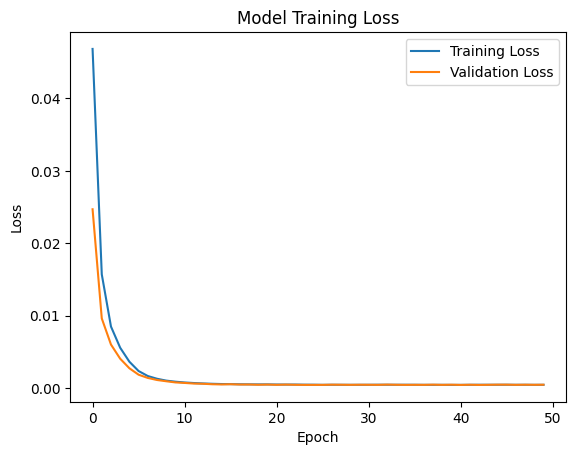

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,839 (132.19 KB)

 Trainable params: 11,279 (44.06 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,560 (88.13 KB)

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Training Loss')
plt.show()
model.summary()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


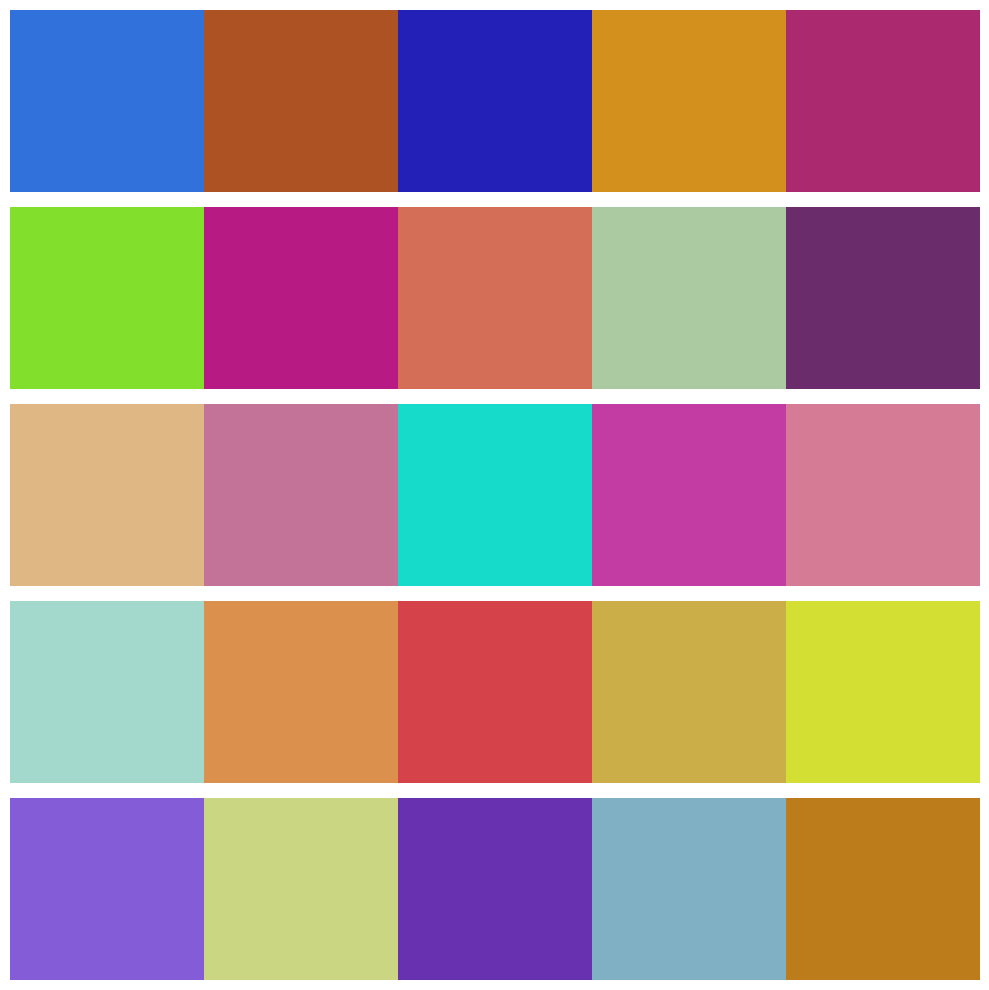

In [19]:
# Generate a few random latent vectors
num_palettes = 5
random_inputs = np.random.rand(num_palettes, 15)

# Use the model to generate new color palettes
generated_palettes = model.predict(random_inputs)

# Reshape and display the generated palettes
def show_palettes(palettes):
    fig, axs = plt.subplots(len(palettes), 1, figsize=(10, 2 * len(palettes)))

    for i, palette in enumerate(palettes):
        # Reshape to 5 colors, each with 3 RGB values
        colors = np.reshape(palette, (5, 3))
        axs[i].imshow([colors], aspect='auto')
        axs[i].axis('off')

    plt.tight_layout()
    plt.show()

# Show generated palettes
show_palettes(generated_palettes)



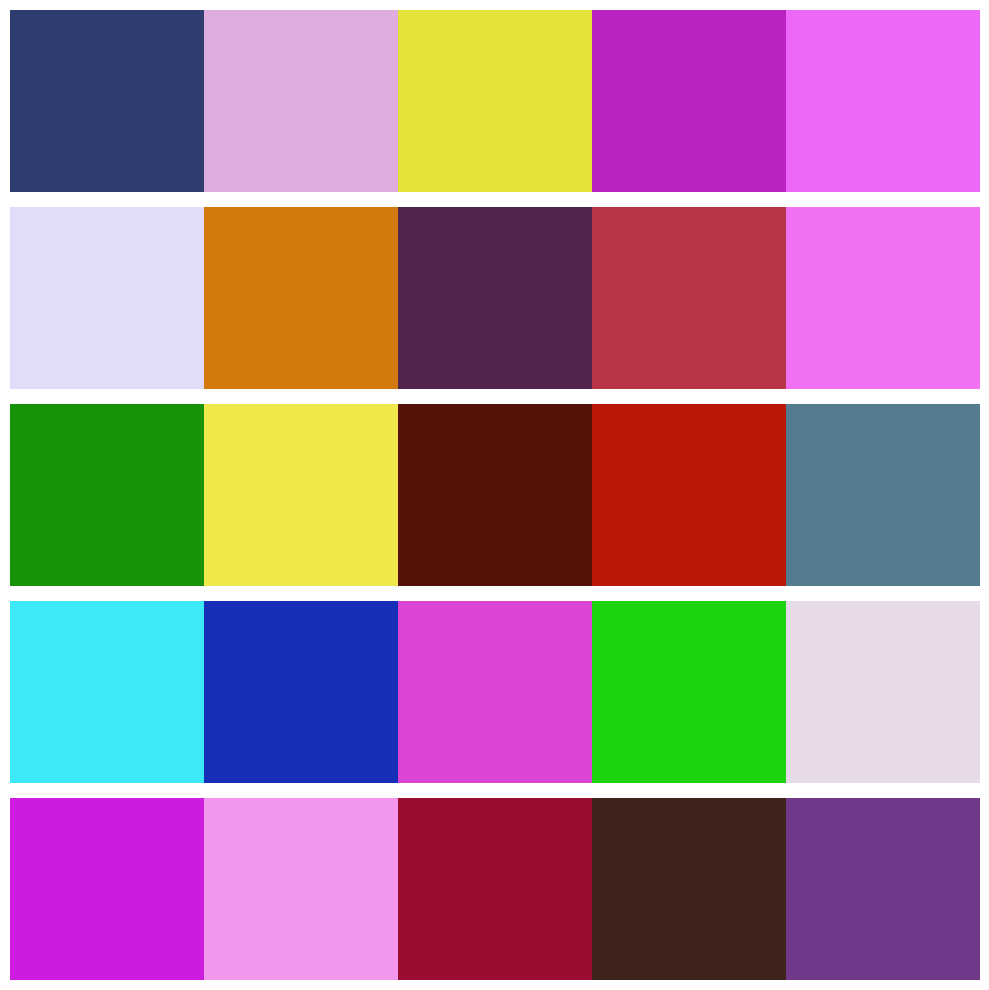

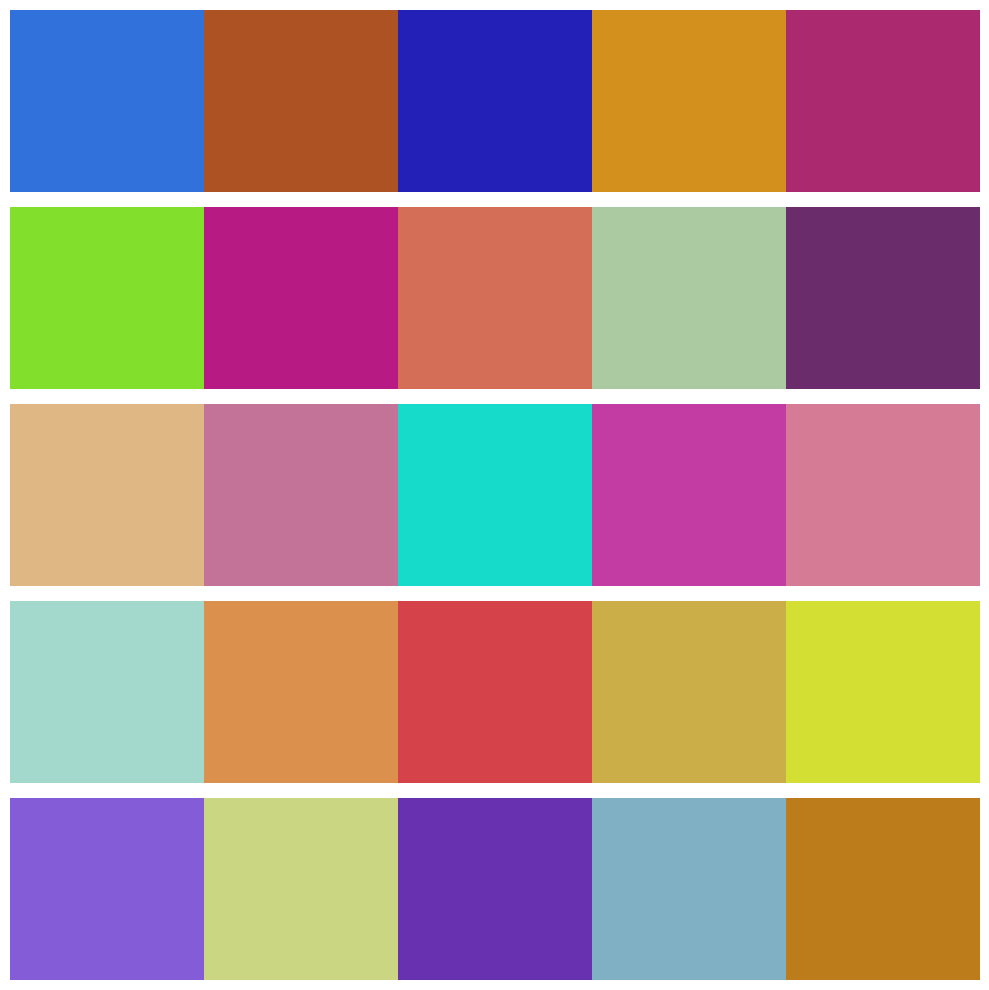

In [27]:
# Compare real and generated palettes side-by-side
real_palettes = X[:5]
show_palettes(real_palettes)
show_palettes(generated_palettes)



In [28]:
def rgb_to_hex(rgb):
    return '#' + ''.join(f'{int(val * 255):02x}' for val in rgb)

for i, palette in enumerate(generated_palettes):
    print(f"Palette {i + 1}:")
    for color in np.reshape(palette, (5, 3)):
        print(rgb_to_hex(color))
    print()



Palette 1:
#3171dc
#ad5323
#2320b7
#d4901c
#ab296f

Palette 2:
#82e02c
#b71a83
#d46e57
#accaa2
#6b2c6c

Palette 3:
#deb785
#c37298
#16daca
#c23ca3
#d67b95

Palette 4:
#a3d9cc
#db904e
#d6424a
#cbae47
#d3e033

Palette 5:
#855cd7
#cad682
#6831af
#80b0c4
#bd7c1c



In [29]:
!pip install -q sentence-transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 94.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 81.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.4 MB/s eta 0:00:00


In [30]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt


In [31]:
df = pd.read_json("https://huggingface.co/datasets/huggingface-projects/color-palettes-sd/resolve/main/data.json")

# Extract prompt and all colors from each row
def extract_colors_and_prompt(row):
    all_colors = []
    for image in row['data']['images']:
        all_colors.extend(image['colors'])  # each color is a hex string
    return pd.Series([row['data']['prompt'], all_colors])

df[['prompt', 'colors']] = df.apply(extract_colors_and_prompt, axis=1)

# Convert hex colors to normalized RGB
def hex_to_rgb(hex_color):
    h = hex_color.lstrip("#")
    return [int(h[i:i+2], 16) / 255.0 for i in (0, 2, 4)]

df['rgb_colors'] = df['colors'].apply(lambda x: [hex_to_rgb(c) for c in x])

# Filter to exactly 5 colors per prompt (optional but keeps shape clean)
df = df[df['rgb_colors'].apply(lambda x: len(x) == 5)]


In [32]:
model_embedder = SentenceTransformer('all-MiniLM-L6-v2')

# Convert prompts to embeddings (384-dim vectors)
prompt_embeddings = model_embedder.encode(df['prompt'].tolist())

# Flatten the 5 RGB colors into 15 numbers
color_targets = np.array([np.array(c).flatten() for c in df['rgb_colors']])


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [33]:
# Build the model with the correct input shape
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(prompt_embeddings.shape[1],)))  # Input: 384
model.add(Dense(256, activation='relu'))
model.add(Dense(15, activation='sigmoid'))  # Output: 5 RGB colors × 3

model.compile(optimizer='adam', loss='mean_squared_error')
# Train the model and capture the training history
history = model.fit(prompt_embeddings, color_targets, epochs=50, batch_size=32)




Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0627
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0584 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0583  
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0571 
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0560 
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0540 
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0510  
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0514  
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0488  
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0460 
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0438
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0416
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0369
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0353
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0331
Epoch 16/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 

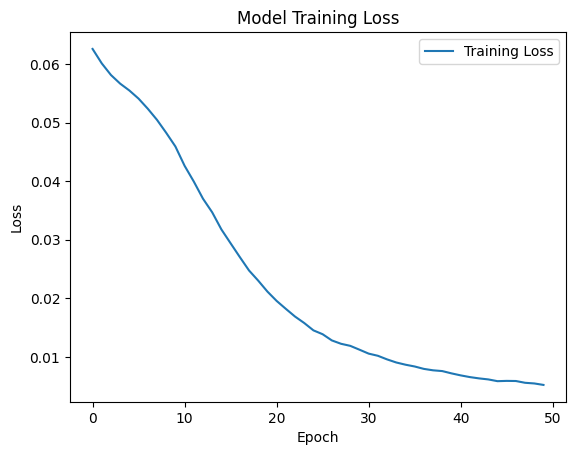

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 15)             │         3,855 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 258,479 (1009.69 KB)

 Trainable params: 86,159 (336.56 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 172,320 (673.13 KB)

In [34]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Training Loss')
plt.show()
model.summary()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


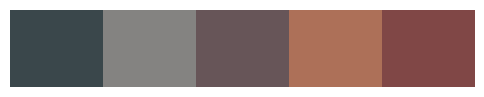

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


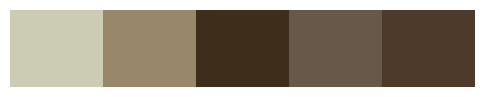

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


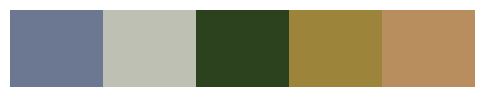

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


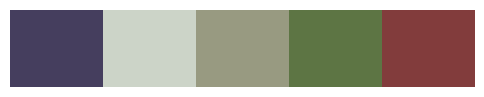

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


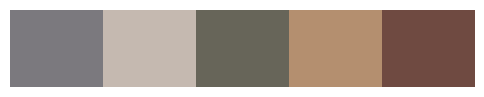

In [35]:
def generate_palette(prompt):
    # Convert the prompt to an embedding using the SentenceTransformer model
    vec = model_embedder.encode([prompt])  # (1, 384)

    # Predict the color palette using the trained model
    pred = model.predict(vec)[0]  # Output shape: (15,)

    # Reshape the output into 5 RGB colors
    colors = np.reshape(pred, (5, 3))

    return colors


def show_palette(palette):
    fig, ax = plt.subplots(figsize=(6, 1))
    ax.imshow([palette], aspect='auto')
    ax.axis('off')
    plt.show()

palette = generate_palette("a rainy night in Tokyo")
show_palette(palette)

palette = generate_palette("a sunny day in New York City")
show_palette(palette)

palette = generate_palette("In a green rainforest")
show_palette(palette)

palette = generate_palette("Peaceful and calm")
show_palette(palette)

palette = generate_palette("A carnival at dusk")
show_palette(palette)

